In [1]:
import os
os.chdir("../..")
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from functools import reduce
from operator import mul

import numpy as np
import tqdm.auto as tqdm
import pandas as pd
import matplotlib.pyplot as plt

from modular_splicing.eclip.test_motifs.names import peak_names
from modular_splicing.eclip.data.pipeline import eclip_dataset_with_spliceai_pipeline, load_peaks

In [4]:
assert peak_names(replicate_category="1") == (peak_names(replicate_category="2"))

In [5]:
# Check the ordering start <= end

dataset_path = "canonical_dataset.txt"
sequence_path = "canonical_sequence.txt"
genes = pd.read_csv(
    dataset_path,
    sep="\t",
    names=[
        "gene",
        "chunk",
        "chrom",
        "strand",
        "start",
        "end",
        "donors",
        "acceptors",
    ],
)
eclips_text = load_peaks(replicate_category="1")
for k in eclips_text:
    assert (eclips_text[k].start <= eclips_text[k].end).all()
assert (genes.start <= genes.end).all()
arrayifier = lambda x: np.array(list(map(int, x.strip(",").split(","))))
don, acc = genes.donors.map(arrayifier), genes.acceptors.map(arrayifier)
assert np.all([(x <= y).all() for x, y in zip(don, acc)])

In [6]:
total, bad, result = eclip_dataset_with_spliceai_pipeline(
    replicate_category="1",
    is_train=False,
    dataset_path="canonical_dataset.txt",
    sequence_path="canonical_sequence.txt",
)

In [7]:
percentages = {k : bad[k] / total[k] for k in sorted(total)}

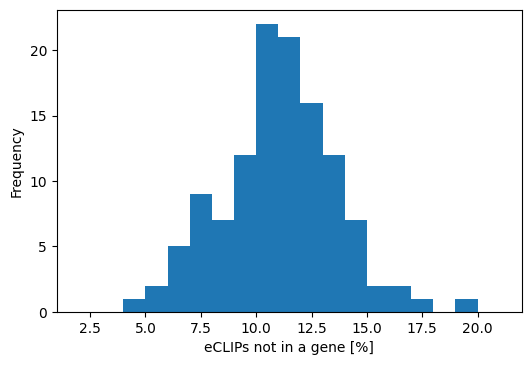

In [8]:
plt.figure(dpi=100)
pctgs = np.array(list(percentages.values())) * 100
lo, hi = int(pctgs.min()) - 3, int(pctgs.max()) + 3
plt.hist(pctgs, bins=np.arange(lo, hi + 1))
plt.xlim(lo, hi)
plt.xlabel("eCLIPs not in a gene [%]")
plt.ylabel("Frequency")
plt.show()